In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define the loss func
def quadratic_loss(x, y):
    return x**2 + 10*y**2

In [3]:
#gradient of the loss function
def quadratic_loss_gradient(x, y):
    return np.array([2*x, 20*y])

In [4]:
#Gradient descent algorithm
def gradient_descent(grad_func, lr, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        x -= lr*grad[0]
        y -= lr*grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [5]:
#Adam optimizer algorithm
def adam_optimizer(grad_func, lr, beta1, beta2, epsilon, epochs, start_point):
    x, y = start_point
    m = np.array([0.0, 0.0]) # first moment vector (Momentum)
    v = np.array([0.0, 0.0]) # second moment vector (RMSProp)
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for t in range(1, epochs + 1):
        grad = grad_func(x, y) #Compute gradient
        
        #update the biased first moment
        m = beta1*m + (1-beta1)*grad
        #update the biased second moment
        v = beta2*v + (1-beta2)*(grad**2)
        
        #correct the bias in first moment
        m_hat = m / (1 - beta1**t)
        #correct the bias in second moment
        v_hat = v / (1 - beta2**t)
        
        #update the parameters
        x -= lr*m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr*m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [6]:
#Visualization of paths
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)
    
    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')
    
    for path, label in zip(paths, labels):
        plt.plot(path[:, 0], path[:, 1] , label=label)
        plt.scatter(path[0, 0], path[0, 1], color='red', marker='o', label='Start')
        plt.scatter(path[-1, 0], path[-1, 1], color='green', marker='x', label='End')
        
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [7]:
#Visualization of losses
def plot_losses(losses, labels, title):
    plt.figure(figsize=(10, 6))
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
        
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
#parameters
lr_gd = 0.1
lr_adam = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = 100
start_point = (1.5, 1.5)

In [9]:
#Run the gradient descent algorithm
path_gd, losses_gd = gradient_descent(quadratic_loss_gradient, lr_gd, epochs, start_point)
#Run the Adam optimizer algorithm
path_adam, losses_adam = adam_optimizer(quadratic_loss_gradient, lr_adam, beta1, beta2, epsilon, epochs, start_point)

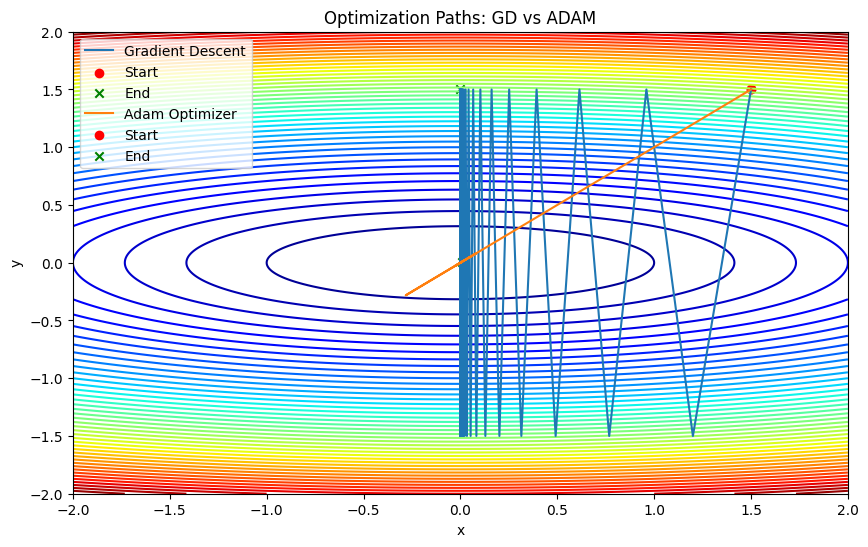

In [10]:
#plot the paths
plot_paths(quadratic_loss, [path_gd, path_adam], ['Gradient Descent', 'Adam Optimizer'], 'Optimization Paths: GD vs ADAM')

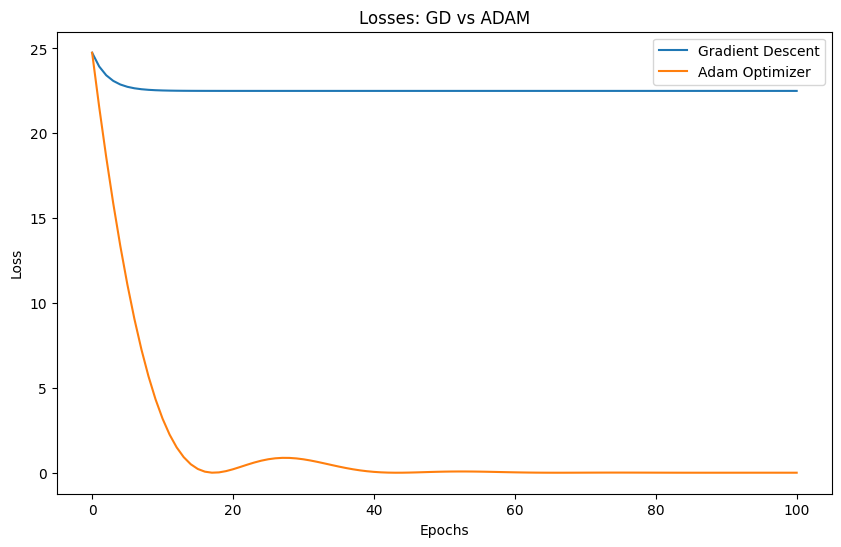

In [11]:
#Plot the losses
plot_losses([losses_gd, losses_adam], ['Gradient Descent', 'Adam Optimizer'], 'Losses: GD vs ADAM')